# Métodos Computacionales

## Unidad 2: 

### Raíces de ecuaciones de una variable

- Ecuaciones lineales y no lineales.
- Método de bisección.
- Método de punto fijo.
- Método de Newton.
- Método de la secante.



## Introducción.

Muchos problemas diferentes en física y astronomía requieren el uso de expresiones complejas, incluso con una dependencia implícita de las variables. Cuando es necesario resolver una de esas variables, un enfoque analítico no suele ser la mejor solución, debido a su complejidad o incluso porque no existe en absoluto. Diferentes enfoques para lidiar con esto comprenden expansiones de series y soluciones numéricas. Entre los enfoques numéricos más utilizados se encuentran el método de bisección o búsqueda binaria, la iteración de punto fijo, los métodos de Newton.


Así el problema de hallar las raíces de una función consiste en:

- Dada una función continua $f(x) \in C[a,b]$ hallar los valores de x=r para los cuales se cumple:

$$f(r)=0$$

- El número x=r tal que se cumpla la f(r)=0 se conoce como la raíz de la ecuación f(x) o cero de la función f(x).

- El problema de hallar las raíces de una ecuación es uno de los problemas más importantes computacionales.

## Linealidad 

Recordemos que un sistema o ecuación es lineal si satisface a las propiedades de aditividad:

$$f(x+y)=f(x)+f(y)$$

y homogeneidad 

$$f(ax)=af(x)$$

y en caso contrario el sistema es **no lineal.**

Dicho de otra forma, una ecuacion lineal es aquella que tiene la forma de un polinomio de primer grado, es decir las incognitas no estan elevadas a potencias ni multiplicadas entre sı. Ejemplo: $2x+3y=4$, $3x-5y+2z=1$

Ejemplo de sistemas no lineales: $x^2+x-1=0$ o $x-sinx=0$

En general si una función no es lineal es bastante complejo encontrar sus raices, de hecho Si f(x) es un polinomio de grado mayor que 4 o bien no es polinomica, no hay ninguna formula conocida de solucion. Además salvo pocas excepciones, no es posible hallar expresiones analíticas para hallar las raíces como el caso de la ecuación cuadrática.
$$x=\frac{-b±\sqrt{b^2-4ac}}{2a}$$

Por eso en muchos de los casos es necesario usar metodos numericos, los cuales siempre permiten dar soluciones, aunque con cierta aproximacion.

## Método  de bisección

Es el metodo mas elemental y antiguo para determinar las raıces de una ecuacion, este se basa en el **Teorema de Bolzano o valor intermedio** https://es.wikipedia.org/wiki/Teorema_del_valor_intermedio cuyo algoritmo esta dado por:

<img align="center" src="https://sites.google.com/site/ittgmetodosnumericos/_/rsrc/1334897944964/home/unidad-2-raices-de-ecuaciones/Imagen2.png?height=320&width=286"  width=45% />


**Algoritmo** 

1. Definir la función y el intervalo.
2. A continuación se verifica que ${\displaystyle f(a)\cdot f(b)<0}$.
3. Se calcula el punto medio ${\displaystyle m}$ del intervalo ${\displaystyle [a,b]}$ y se evalúa ${\displaystyle f(m)}$ si ese valor es igual a cero, ya hemos encontrado la raíz buscada.
4. En caso de que no lo sea, verificamos si ${\displaystyle f(m)}$ tiene signo opuesto con ${\displaystyle f(a)}$ o con ${\displaystyle f(b)}$.
5. Se redefine el intervalo ${\displaystyle [a,b]}$ como ${\displaystyle [a,m]}$ o ${\displaystyle [m,b]}$ según se haya determinado en cuál de estos intervalos ocurre un cambio de signo
6. Con este nuevo intervalo se continúa sucesivamente encerrando la solución en un intervalo cada vez más pequeño, hasta alcanzar la precisión deseada

In [ ]:
import numpy as np
 

def biseccion(f, a, b, tol):
    
    if a > b:
        raise ValueError("Intervalo mal definido.")
    if tol <= 0:
        raise ValueError("La cota de error debe ser un número positivo.")
        
    x = (a + b) / 2.0
    i=1
    while True:
        if b - a < tol:
            i+=1
            return(x,i)
        # Utilizamos la función signo para evitar errores de precisión
        elif np.sign(f(a)) * np.sign(f(x)) > 0: #+*- o -*+
            i+=1 #para el contador
            a = x
        else:
            i+=1
            b = x
        x = (a + b) / 2.0
    return(x,i)

In [ ]:
tol=1.0e-9
biseccion(np.sin, -10,-6,tol)

(-9.424777960870415, 34)

Ejemplo

Obtener la raíz de la siguiente función:
$$f(x) = 2x^3 -8x-2$$


In [ ]:
def pol_3(x):
    return(2*x**3-8*x-2)

In [ ]:
biseccion(pol_3,-1,1,tol)

(-0.25410168850794435, 33)

In [ ]:
pol_3(biseccion(pol_3,-1,1,tol)[0])  # Evaluamos el polinomio en la raiz

1.0877783118701245e-09

La bisección converge linealmente, por lo cual es un poco lento. Sin embargo, se garantiza la convergencia si ${\displaystyle f(a)}$ y ${\displaystyle f(b)}$ tienen distinto signo.

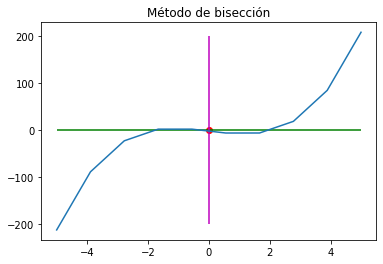

In [ ]:
import matplotlib.pylab as plt

x1=np.linspace(-5,5,10)
y1=pol_3(x1)
plt.title('Método de bisección')
plt.plot(x1,y1)
plt.scatter(0,-0.2541016899049282, c='r')
plt.hlines(0,-5,5,'g')  # liena horizontal
plt.vlines(0,-200,200,'m') # linea vertical

plt.show()

## Método de punto fijo

Consiste en

-Dada la función $f(x)$, se reordena para obtener expresión de $x$

$$f(x)\Leftrightarrow g(x)=x$$

-Si se resuelve $g(x)$ se resuelve f(x)=0
-Solución de $g(x)$ mediante

$$x_{i+1}=g(x_{i})$$

hasta que $x_{i+1}$ converge a $x_{i}$


Ejemplo: Raíz de la función  $e^{-x}-x=0$




$f(x)=x-\exp(-x)$ 

$x=\exp(-x)$

$x_0=1$

$x_1=g(x_0)$

$x_2=g(x_1)$

$x_{20}\ldots (x_{20}) \approx 0.5$

**buscar g(x)** de la
Función $f(x)=x^{2}-2x-3=0$
Las raíces son $(x_{1}=3,x_{2}=-1)$

Se puede reescribir de 3 formas

1) $x^{2}=2x+3 \Rightarrow , g(x)=\sqrt{2x+3}$

2)$x(x-2)-3=0, \Rightarrow g(x)=\frac{3}{x-2}$

3) $ 2x=x^{2}-3, \Rightarrow g(x)=\frac{x^{2}-3}{2} $

¿Cual de los esquemas es mejor?

In [ ]:
def puntofijo(gx,a,tol):
    i = 1 # iteración
    b = gx(a)
    tramo = abs(b-a)
    while(tramo>=tol):
        a = b
        b = gx(a)
        tramo = abs(b-a)
        i = i + 1
    respuesta = b
    
    return(respuesta,i)

In [ ]:
def f_x(x):
    return(np.e**(-x)-x)
def g_x(x):
    return(np.e**(-x))

a = 0       # intervalo
tolera = 1e-5

# PROCEDIMIENTO
respuesta = puntofijo(g_x,a,tolera)
respuesta

(0.5671407814582979, 22)

In [ ]:
def g_x1(x):
    return(np.sqrt(2*x+3))
def g_x2(x):
    return(3/(x-2))
def g_x3(x):
    return((x**2-3)/2)

a = 1       # intervalo
tolera = 1e-5
r1 = puntofijo(g_x1,a,tolera)
r2 = puntofijo(g_x2,a,tolera)
r3 = puntofijo(g_x3,a,tolera)
print(r1,r2,r3)

(2.999995383462856, 12) (-0.9999991636995423, 14) (-1.0, 2)


## Método de Newton

El método de Newton o método de Newton-Raphson linealiza la función a cada paso utilizando su derivada, que se debe proporcionar como argumento, para hallar la raíz de la ecuación en las proximidades de un punto inicial $x_{0}$. Este método puede no converger, pero si el punto inicial está lo suficientemente próximo a la raíz, la convergencia será muy rápida.

- El método de recursión de Newton es muy efectivo y simple de
implementar.
-Pertenece a los métodos abiertos.
-Conocido también como Newton-Rapson.
-La función debe ser derivable en el intervalo que interesa-
-Partiendo de un valor tentativo de la raíz, se va mejorando
recursivamente aproximando el siguiente valor de la raíz como la
intersección con el eje de $x$ la linea tangente en el punto anterior de $x$.
-Consiste en elegir adecuadamente un valor de prueba $x_{0}$ de tal manera que $f(x_{0})$ sea no muy grande.
-La tangente en el punto $x=x_{0}$ es $f^{'}(x_{0})$, y dela ecuación de la linea tangete que pasa por los puntos $(x_{0},f(x_{0}))$ y $(x_{1},f(x_{1})=0)$ se obtiene la siguiente aproximación


$$x_{1}=x_{0}- \frac{f(x_{0})}{f^{'}(x_{0})}$$

-Este procedimiento se repite recursivamente hasta lograr la tolerancia especificada.

$$x_{n+1}=x_{n}-\frac{f(x_{n})}{f^{'}(x_{n})}$$

Cuando la primera prueba $x_{0}$ es bastante cercana al valor verdadero, los valores sucesivos $x_{n}$ son cada vez más cercanos y tienden a un valor fijo.



<img align="center" src="https://qph.fs.quoracdn.net/main-qimg-b3ff8a5f14c4a4e7525533518dbcd7f0.webp"  width=60% />

In [ ]:
def newton(f, df, x_0, maxiter=50, xtol=1.0e-6, ftol=1.0e-6):
    
    x = float(x_0)
    for i in range(maxiter):
        dx = -f(x) / df(x) # ¡Aquí se puede producir una división por cero!
        # También x puede haber quedado fuera del dominio
        x = x + dx
        if abs(dx / x) < xtol and abs(f(x)) < ftol:   #x=x1+dx ->1=x1/x+dx/x
            return x

- El método garantiza como mínimo convergencia cuadrática.
- Necesidad de calcular la derivada, complicaciones.
- El punto de partida tiene que ser muy cercano a la raíz buscada.
- Caso contrario puede no se podría la raíz.

Encuentre la raiz de la función usada en punto fijo

## Método de la Secante

El método de Newton-Raphson es altamente eficiente ya que la convergencia se acelera, sin embargo, existe una debilidad: es necesario conocer de antemano la derivada de la función. Este aspecto puede ser complicado cuando se trata de funciones numéricas o incluso funciones analíticas muy complicadas. Se pueden aplicar métodos numéricos para derivar la función de entrada, pero este procedimiento adicional puede implicar un tiempo de computación adicional que compensa el tiempo empleado mediante el uso de otros métodos como la bisección.

Retomando la expresión iterativa obtenida del método Newton-Raphson:

$$p_{n+1} = p_n - \frac{f(p_n)}{f'(p_{n+1})}$$

La derivada puede ser aproximada como

$$f'(p_n) = \lim_{x\rightarrow p_n} \frac{f(x)-f(p_n)}{x-p_n} $$

Como sabemos, la convergencia del método NR es cuadrática, por lo que $ p_ {n-1} $ debe estar lo suficientemente cerca de $ p_n $ para que se pueda suponer $ p_ {n-1} \rightarrow p_n $ y el término anterior es:

$$f'(p_n) \approx \frac{f(p_{n})-f(p_{n-1})}{p_{n}-p_{n-1}} $$

La expresión final para la iteración $ n $ -th de la raíz es entonces:

$$x_{n+1}=x_{n}-\frac{x_{n}-x_{n+1}}{f(x_{n})-f(x_{n-1})}f(x_{n}) $$

En esto consiste el método Secante, que es solo una aproximación al método Newton-Raphson, pero sin el término derivado. Además como se puede ver, este método necesitará dos aproximaciones iniciales de la raíz para poder inducir una pendiente inicial.

In [ ]:
def secant(f, x0, x1, eps):
    import sys
    global x
    f_x0 = f(x0)
    f_x1 = f(x1)
    iteration_counter = 0
    while abs(f_x1) > eps and iteration_counter < 50:
        try:
            denominator = float(f_x1 - f_x0)/(x1 - x0)
            x = x1 - float(f_x1)/denominator
        except ZeroDivisionError:
            print("Error! - 0 en el denominador para x = ", x)
            sys.exit(1)     # Abort with error
        x0 = x1
        x1 = x
        f_x0 = f_x1
        f_x1 = f(x1)
        iteration_counter += 1
    # Here, either a solution is found, or too many iterations
    if abs(f_x1) > eps:
        iteration_counter = -1
    return x, iteration_counter

In [ ]:
def f(x):
    return np.sin(x**2) - x**3 - 1

In [ ]:
secant(f,-1,0.5,1e-8)

(-0.7649722604105283, 12)

## REFERENCIAS.
[1] ["Método de Bisección"](https://es.wikipedia.org/wiki/Método_de_bisección)

[2] ["Punto fijo"](http://blog.espol.edu.ec/analisisnumerico/2-4-1-punto-fijo-ejemplo01/)

[3] ["Método de Newton"](https://en.wikipedia.org/wiki/Newton%27s_method)

In [ ]:
try:
    print(y)
except NameError:
    print("Variable x is not defined")

Variable x is not defined
